In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
path = "/content/drive/MyDrive/Extract.xlsx"
df = pd.read_excel(path)
print(len(df))
df.head()

10000


,y,x1,x2,x3,x4
0,0.0,3861.22,3861.66,3860.75,3861.38
1,0.0,3861.19,3861.38,3860.16,3861.25
2,0.0,3861.38,3861.38,3858.47,3858.53
3,1.0,3858.72,3858.72,3857.03,3858.19
4,1.0,3858.09,3859.16,3858.03,3858.81


In [82]:
X = df[["x1","x2","x3","x4","y"]]
X.columns = ["Open","High","Low","Close","target"]
X["Volatility"] = X["High"] - X["Low"]
X["H-C"] = X["High"] - X["Close"]
X["H-O"] = X["High"] - X["Open"] 
X["H/L"] = X["High"]/X["Low"]
X["C/O"] = X["Close"]/X["Open"]
print(X.head(12))
X.tail()

       Open     High      Low    Close  ...   H-O       H/L       C/O     Check
0   3861.22  3861.66  3860.75  3861.38  ...  0.44  1.000236  1.000041  1.000277
1   3861.19  3861.38  3860.16  3861.25  ...  0.19  1.000316  1.000016  1.000332
2   3861.38  3861.38  3858.47  3858.53  ...  0.00  1.000754  0.999262  1.000016
3   3858.72  3858.72  3857.03  3858.19  ...  0.00  1.000438  0.999863  1.000301
4   3858.09  3859.16  3858.03  3858.81  ...  1.07  1.000293  1.000187  1.000480
5   3858.63  3859.63  3858.28  3859.63  ...  1.00  1.000350  1.000259  1.000609
6   3859.53  3859.88  3858.88  3859.66  ...  0.35  1.000259  1.000034  1.000293
7   3859.69  3859.72  3858.22  3858.59  ...  0.03  1.000389  0.999715  1.000104
8   3858.72  3860.31  3858.66  3860.19  ...  1.59  1.000428  1.000381  1.000809
9   3860.31  3861.81  3860.31  3861.53  ...  1.50  1.000389  1.000316  1.000705
10  3861.34  3861.59  3860.41  3860.50  ...  0.25  1.000306  0.999782  1.000088
11  3860.75  3861.00  3859.97  3860.13  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Open,High,Low,Close,target,Volatility,H-C,H-O,H/L,C/O,Check
9995,3794.75,3795.00,3793.75,3794.88,0.0,1.25,0.12,0.25,1.000329,1.000034,1.000364
9996,3794.78,3795.09,3794.53,3794.72,1.0,0.56,0.37,0.31,1.000148,0.999984,1.000132
9997,3794.75,3795.09,3794.47,3794.91,0.0,0.62,0.18,0.34,1.000163,1.000042,1.000206
9998,3794.94,3795.13,3793.38,3794.34,1.0,1.75,0.79,0.19,1.000461,0.999842,1.000303
9999,3794.31,3794.66,3794.06,3794.47,0.0,0.60,0.19,0.35,1.000158,1.000042,1.000200


In [79]:
X["target"].value_counts()

1.0    5039
0.0    4961
Name: target, dtype: int64

In [81]:
col = "C/O"
cols = ["C/O","H/L"]
yes1, yes0 = 0,0
no1, no0 = 0,0
for i in range(1,len(X)):
  j = i-1
  if X[col][i] > 1 and X["target"][j] == 1:
    yes1+=1
  elif X[col][i] > 1 and X["target"][j] == 0:
    yes0+=1
    print(X["C/O"][i]," ",X["H/L"][i],"\n")
  elif X[col][i] < 1 and X["target"][j] == 0:
    no0+=1
  elif X[col][i] < 1 and X["target"][j] == 1:
    no1+=1
print(yes1,yes0,no0,no1)

1.0000155392508527   1.000316049075686 

1.0000155380033666   1.000160571011235 

1.0000413056723014   1.0002272234329328 

1.000041306632038   1.000216887814778 

1.0000077488144314   1.0001059089441395 

1.0000077503158253   1.0002583705602248 

1.0000077451134788   1.0001626725814072 

1.0000154863487836   1.0002091013289551 

1.0000154957477085   1.0001782241129475 

1.0000103537353688   1.0003235961106336 

1.000080258276311   1.000411730433094 

1.0000181131763006   1.0003570911048087 

1.0000571308374082   1.000202569516404 

1.0000233538760948   1.0002517375078506 

1.0000155818658245   1.0002285565872346 

1.0000727342627733   1.0002286290312103 

1.0000077691223999   1.0002667937606524 

1.0000155254189922   1.000155258207337 

1.000038843700717   1.0003055704456407 

1.0000414850614887   1.000235965253468 

1.0000466184769743   1.0003082150978777 

1.0000414632376569   1.0002203037081001 

1.0000336891425077   1.000178824578272 

1.0000233147333573   1.000186537679316 

1.00

In [83]:
col = "C/O"
cols = ["C/O","H/L"]
yes1, yes0 = 0,0
no1, no0 = 0,0
for i in range(1,len(X)):
  j = i-1
  if X[col][i] > 1 and X["target"][j] == 1:
    yes1+=1
  elif X[col][i] > 1 and X["target"][j] == 0:
    yes0+=1
  elif X[col][i] < 1 and X["target"][j] == 0:
    no0+=1
  elif X[col][i] < 1 and X["target"][j] == 1:
    no1+=1
    print(X["C/O"][i]," ",X["H/L"][i],"\n")
print(yes1,yes0,no0,no1)

0.9999587383210108   1.0003637245392822 

0.9999922536865997   1.0001213695651614 

0.9999741462443542   1.0001292761312308 

0.9999922313805613   1.0002667529944966 

0.9999663487921806   1.0001527421091874 

0.9999844980067021   1.0002428783670305 

0.9999766222229148   1.0002753847592722 

0.9999922067801013   1.0002260198170019 

0.9999662524369635   1.0002258748757038 

0.9999766372122483   1.0002180860868866 

0.9999844331325207   1.0002257447631109 

0.9998550795897717   1.0010204372340452 

0.9999844590989384   1.0002746092646948 

0.9999844631232229   1.000095818431841 

0.9999922373507631   1.0002510494903953 

0.9999276029331156   1.0004189359028068 

0.9998214807781368   1.0002199633566926 

0.9999896430208202   1.0002485835914114 

0.9999922305556707   1.0003807215061031 

0.9999844813271569   1.0002431768205924 

0.999958556309025   1.0002435056524397 

0.9999663076269165   1.000184038902195 

0.9999689206933793   1.000365237663515 

0.9999844306280685   1.000137541586866

In [24]:
import scipy as sc
from scipy import stats
p_val,p_coef = stats.pearsonr(X["C/O"],X["target"])
p_val,p_coef

(0.06477258621170716, 8.976315031344806e-11)

## Dataset Preparation

In [28]:
target = []
CO = []
High = []
Low = []
Open = []
Close = []
for i in range(len(X)-1):
  CO.append(X["C/O"][i+1])
  High.append(X["High"][i+1])
  Low.append(X["Low"][i+1])
  Open.append(X["Open"][i+1])
  Close.append(X["Close"][i+1])
  target.append(X["target"][i])
data = pd.DataFrame({})
data["C/O"] = CO
data["High"] = High
data["Low"] = Low
data["Open"] = Open
data["Close"] = Close
data["target"] = target
data.tail()

,C/O,High,Low,Open,Close,target
9994,1.000034,3795.00,3793.75,3794.75,3794.88,0.0
9995,0.999984,3795.09,3794.53,3794.78,3794.72,0.0
9996,1.000042,3795.09,3794.47,3794.75,3794.91,1.0
9997,0.999842,3795.13,3793.38,3794.94,3794.34,0.0
9998,1.000042,3794.66,3794.06,3794.31,3794.47,1.0


In [29]:
p_val,p_coef = stats.pearsonr(data["C/O"],data["target"])
p_val,p_coef

(0.6464845883370879, 0.0)

In [27]:
p_val,p_coef = stats.pearsonr(data["H/L"],data["target"])
p_val,p_coef

(-0.035211046090109804, 0.00042898272662046243)

## Logistic Regression Model

In [30]:
import sklearn
from sklearn.linear_model import LogisticRegression

Model for initial dataset given

In [64]:
features = ["C/O"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XL = X[features]
#XL = df[["x1","x2","x3","x4"]]
#XL = X[["Change%","Volatility","H-O","H-C"]]
XL = (XL - XL.min())/(XL.max() - XL.min())
XL = sc.fit_transform(XL)
y = X["target"]

In [65]:
Lr1 = LogisticRegression()
Lr1.fit(XL,y)
print(Lr1.score(XL,y))

0.543


In [66]:
Lr1.predict([[0.999709]])  # Used for predicting later

array([1.])

Model for preprocessed dataset

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#XL = data[["C/O","High","Low","Open","Close"]]
XL = data[["C/O"]]
XL = (XL - XL.min())/(XL.max() - XL.min())
XL = sc.fit_transform(XL)
y = data["target"]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(XL,y,test_size=0.25,random_state=42)

In [69]:
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
print(Lr.score(X_train,y_train))
Lr.score(X_test,y_test)

0.9506600880117348


0.9444

In [56]:
Lr.coef_, Lr.intercept_

(array([[10.79345159]]), array([-0.14102871]))

In [84]:
test_path = "/content/drive/MyDrive/test_data_Analytics GC.xlsx"
df_test = pd.read_excel(test_path)
df_test.columns = ["Open","High","Low","Close"]
df_test.head()

,Open,High,Low,Close
0,3798.66,3798.84,3798.09,3798.16
1,3798.22,3798.78,3798.13,3798.53
2,3798.50,3799.06,3798.28,3798.28
3,3798.31,3798.41,3797.53,3798.06
4,3797.94,3798.78,3797.84,3798.75


In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame({})
df_test["C/O"] = df_test["Close"]/df_test["Open"]
print(df_test["C/O"].tail())
X["C/O"] = df_test["C/O"]
X = (X - X.min())/(X.max() - X.min())
x = sc.fit_transform(X)

995    0.999976
996    0.999832
997    0.999333
998    0.999808
999    0.999709
Name: C/O, dtype: float64


In [88]:
y_pred = Lr.predict(x)
y_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [90]:
y_pred = y_pred[1:len(y_pred)]
y_pred = np.append(y_pred,1)

In [91]:
y = pd.DataFrame(y_pred,columns=["y"])
y.to_csv("y.csv",index=None)

# ANN Approach

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [71]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_shape=X_train[0].shape))
ann.add(Dense(units=12, activation='relu'))
ann.add(Dropout(0.4))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dropout(0.4))
ann.add(Dense(units=2, activation='softmax'))

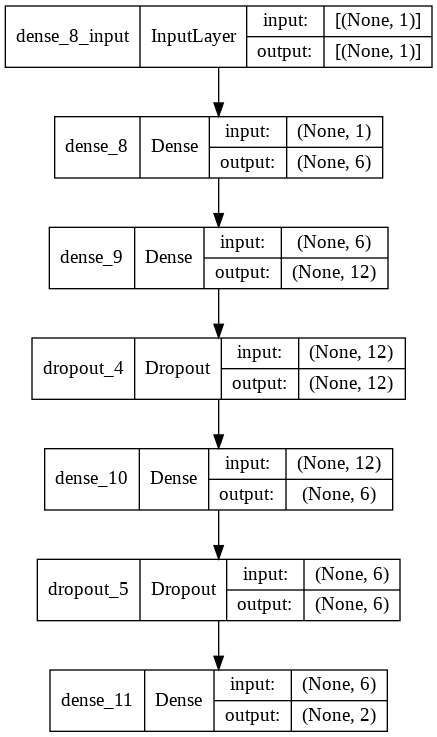

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train,2)
y_test = tf.keras.utils.to_categorical(y_test,2)

In [74]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train,y_train, batch_size=32, epochs=25)

Epoch 1/25
235/235 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7736
Epoch 2/25
235/235 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8518
Epoch 3/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8708
Epoch 4/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8716
Epoch 5/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8791
Epoch 6/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9071
Epoch 7/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9091
Epoch 8/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9116
Epoch 9/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9116
Epoch 10/25
235/235 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9140

In [75]:
ann.evaluate(X_test,y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9444


[0.14794191718101501, 0.9444000124931335]

In [63]:
from keras.models import load_model
ann.save('ann_h9gc.h5')

In [28]:
ann.save_weights("modelcheckpoint",save_format="tf")

In [29]:
ann.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 6) dtype=float32, numpy=
 array([[-0.65711105,  1.265767  ,  1.2789942 ,  1.0619234 ,  0.72742164,
         -1.120248  ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.43228117,  0.33271152,  0.22429729, -0.03827719, -0.02760435,
         0.4168686 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(6, 12) dtype=float32, numpy=
 array([[-0.33812732, -0.23640966, -0.3516274 , -0.18749419, -0.05382181,
          0.23228282,  0.37208766, -0.40397477,  0.00579976,  0.4322136 ,
         -0.5385192 ,  0.3009395 ],
        [ 0.4752022 , -0.80636436,  0.57955444,  0.00136324, -0.8864439 ,
         -0.29174212, -0.43380404, -0.72033936, -0.07163794, -0.37544057,
         -0.00761813,  0.65831584],
        [ 0.6133001 , -0.64939857,  0.6300616 , -0.16355066, -0.517362  ,
         -0.10122085, -0.14249703, -0.36304778,  0.84333915, -0.46723798,
         -0.4267544 ,  0.77769464],
        [ 0.3959622 , -0